<a href="https://colab.research.google.com/github/barkhahbpp/tweetdisasterbert/blob/main/bert_disaster_tweet_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Installing Dependencies #

Install dependency packages / libraries that support NLP Tweet Disaster.

In [1]:
!pip install tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 69.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.9 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing install

# 2. Dataset #

Link Dataset :

https://github.com/barkhahbpp/tweetdisasterbert.git

Sumber Dataset :

https://www.kaggle.com/datasets/vstepanenko/disaster-tweets

https://www.kaggle.com/datasets/vbmokin/nlp-with-disaster-tweets-cleaning-data

**Data Descripstion**

|Field name|Description|
|--- |--- |
|id	|A unique identifier for each tweet |
|keyword	|A particular keyword from the tweet |
|location	|The location the tweet was sent from (may be blank) |
|text| The text of the tweet|
|target| Denotes whether a tweet is about a real disaster (1) or not (0)|

## 2.1. Data Loading ##

In [2]:
import numpy as np
import pandas as pd

In [3]:
dataseturl = "https://raw.githubusercontent.com/barkhahbpp/tweetdisasterbert/main/dataset/tweets.csv"
twdisaster_df = pd.read_csv(dataseturl)
twdisaster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB


## 2.2. Explanatory Data Analysis ##

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
twdisaster_df.head(5)

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [7]:
twdisaster_df = twdisaster_df.drop(['keyword','location'],axis=1)
twdisaster_df.head()

,id,text,target
0,0,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,Telangana: Section 144 has been imposed in Bha...,1
2,2,Arsonist sets cars ablaze at dealership https:...,1
3,3,Arsonist sets cars ablaze at dealership https:...,1
4,4,"""Lord Jesus, your love brings freedom and pard...",0


In [8]:
twdisaster_df.groupby('target').describe()

id                                                           \
         count         mean          std  min      25%     50%      75%   
target                                                                    
0       9256.0  5631.622191  3247.050923  4.0  2853.75  5635.5  8404.50   
1       2114.0  5916.021760  3423.980548  0.0  2714.50  5930.0  9131.75   

                 
            max  
target           
0       11368.0  
1       11369.0

In [9]:
twdisaster = len(twdisaster_df.loc[twdisaster_df['target']==1])
twnotdisaster = len(twdisaster_df.loc[twdisaster_df['target']==0])


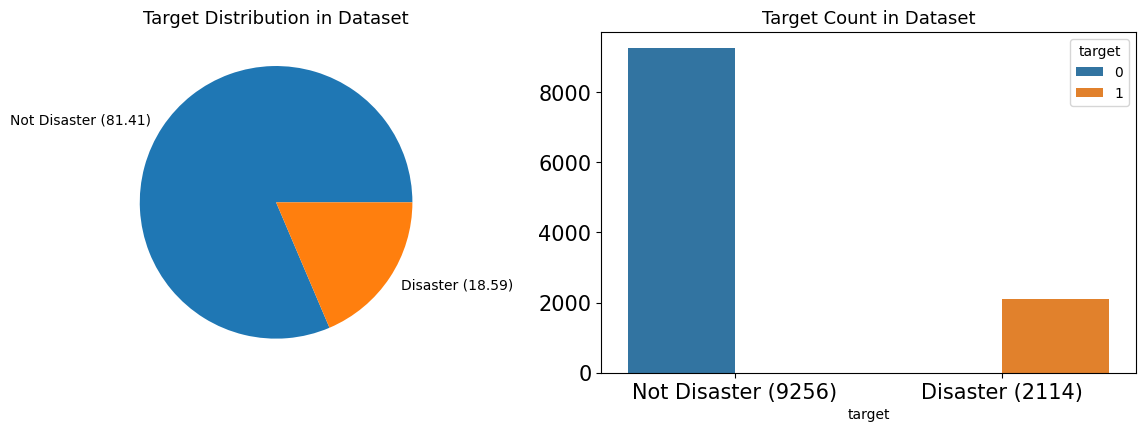

In [47]:
prop_disaster = twdisaster / len(twdisaster_df) * 100
prop_notdisaster = twnotdisaster / len(twdisaster_df) * 100

fig, axes = plt.subplots(ncols=2, figsize=(12, 4), dpi=100)
plt.tight_layout()

twdisaster_df.groupby('target').count()['id'].plot(kind='pie', ax=axes[0], labels=['Not Disaster ('+'{:.2f}'.format(prop_notdisaster)+')', 'Disaster ('+'{:.2f}'.format(prop_disaster)+')'])
sns.countplot(x=twdisaster_df['target'], hue=twdisaster_df['target'], ax=axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Not Disaster ('+str(twnotdisaster)+')', 'Disaster ('+str(twdisaster)+')'])
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Target Distribution in Dataset', fontsize=13)
axes[1].set_title('Target Count in Dataset', fontsize=13)

plt.show()


## 2.3 Descriptive Analysis of Dataset ##

this section will explain descriptive statistic of dataset. Information about number of character and number of token from dataset will be calculated and evaluated

In [11]:
# calculate number of token and character from the text
# number of character
twdisaster_df['numofchars'] = twdisaster_df['text'].str.len()

# number of word tokens
twdisaster_df['numofwords'] = twdisaster_df['text'].str.split().map(lambda x: len(x))
twdisaster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11370 non-null  int64 
 1   text        11370 non-null  object
 2   target      11370 non-null  int64 
 3   numofchars  11370 non-null  int64 
 4   numofwords  11370 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 444.3+ KB


In [12]:
twdisaster_df

,id,text,target,numofchars,numofwords
0,0,"Communal violence in Bhainsa, Telangana. ""Ston...",1,125,19
1,1,Telangana: Section 144 has been imposed in Bha...,1,131,23
2,2,Arsonist sets cars ablaze at dealership https:...,1,63,7
3,3,Arsonist sets cars ablaze at dealership https:...,1,87,8
4,4,"""Lord Jesus, your love brings freedom and pard...",0,140,23
...,...,...,...,...,...
11365,11365,Media should have warned us well in advance. T...,0,92,17
11366,11366,i feel directly attacked 💀 i consider moonbin ...,0,115,22
11367,11367,i feel directly attacked 💀 i consider moonbin ...,0,139,23
11368,11368,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0,105,17


In [13]:
twdisaster_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,11370.0,5684.500000,3282.380615,0.0,2842.25,5684.5,8526.75,11369.0
target,11370.0,0.185928,0.389066,0.0,0.00,0.0,0.00,1.0
numofchars,11370.0,107.571944,30.135399,5.0,94.00,119.0,126.00,149.0
numofwords,11370.0,17.166139,5.510808,1.0,14.00,18.0,21.00,32.0


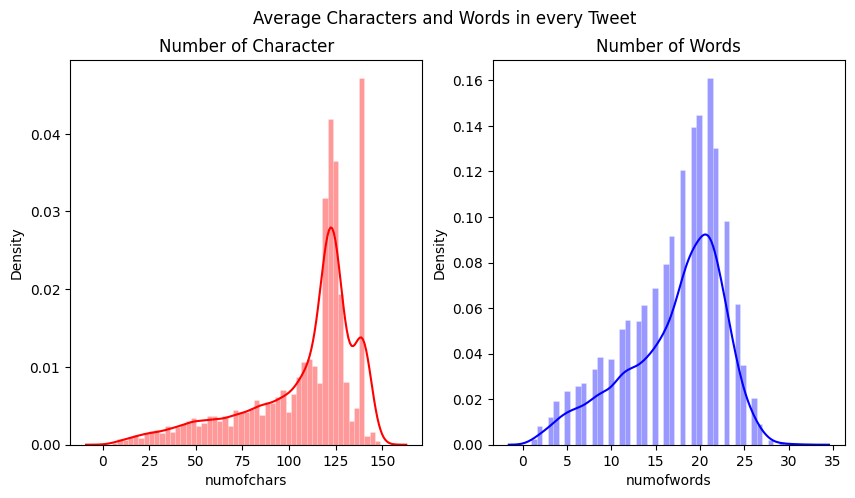

In [14]:
import seaborn as sns

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))

sns.histplot(twdisaster_df.numofchars.map(lambda x: np.mean(x)), ax=ax1, color="red", kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))
ax1.set_title('Number of Character')

sns.histplot(twdisaster_df.numofwords.map(lambda x: np.mean(x)), ax=ax2, color="blue", kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))
ax2.set_title('Number of Words')

fig.suptitle('Average Characters and Words in every Tweet')

plt.show()

## 2.4. Addressing Problem Imbalanced Data ##

According to the dataset analytics, we conlude that the data are imbalanced. Non-disaster data are larger than disaster data. We use the downsampling to balance data between disaster and non-disaster. Downsampling is a technique to handle imbalanced data that reduce the number of samples having the bias.

In [15]:
disaster_df = twdisaster_df[twdisaster_df['target']==1]
disaster_df.shape

(2114, 5)

In [20]:
nondisaster_df = twdisaster_df[twdisaster_df['target']==0]
nondisaster_df.shape

(9256, 5)

In [21]:
downsampled_nondisaster_df = nondisaster_df.sample(disaster_df.shape[0])
downsampled_nondisaster_df.shape

(2114, 5)

In [22]:
balanced_df = pd.concat([disaster_df, downsampled_nondisaster_df])
balanced_df.shape

(4228, 5)

In [23]:
balanced_df['target'].value_counts()

1    2114
0    2114
Name: target, dtype: int64

In [24]:
balanced_df.sample(20)

,id,text,target,numofchars,numofwords
10212,10212,SEVERE WEATHER OUTLOOK rest of the night Get R...,1,115,17
1397,1397,Body bagging,0,12,2
8181,8181,A British girl was held as a sex slave for 13 ...,1,121,28
325,325,"Two days. That's how long they had. Two days, ...",0,117,20
5845,5845,If that had been the case then this would have...,0,97,16
10572,10572,"In the whole history of NJ,there is one person...",1,123,21
2758,2758,What were you told about guys with good heart?...,0,97,15
611,611,#USASupportsTerrorist 15 out of the 19 terrori...,1,124,19
457,457,I believe this is the most credible current in...,1,97,13
10439,10439,Parents and carers are faced with the responsi...,1,132,19


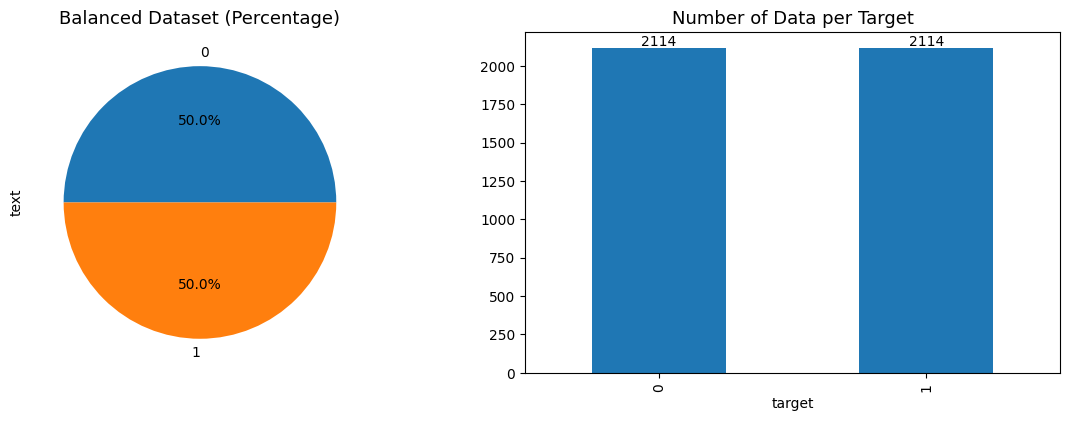

In [48]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4), dpi=100)
plt.tight_layout()

balanced_target = balanced_df.groupby('target').agg('count')
balanced_target = balanced_target.drop(['id', 'numofchars', 'numofwords'], axis=1)

balanced_target['text'].plot(ax=axes[0],kind="pie", autopct="%.1f%%")
balanced_target['text'].plot(ax=axes[1],kind="bar")

for container in axes[1].containers:
  axes[1].bar_label(container)

axes[0].set_title('Balanced Dataset (Percentage)', fontsize=13)
axes[1].set_title('Number of Data per Target', fontsize=13)

plt.show()

# 3. Data Preprocessing#

## 3.1. Splitting Train and Test Data

Model will split dataset into training and test. We stratify data sample in which each class have an equal number of samples. We are also construct validation data from dataset in order to validate model during training process.

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(balanced_df['text'],
                                                    balanced_df['target'],
                                                    test_size=0.2,
                                                    stratify=balanced_df['target'])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.25,
                                                  stratify=y_train)


In [ ]:
y_train.value_counts()

0    1268
1    1268
Name: target, dtype: int64

In [ ]:
y_test.value_counts()

1    423
0    423
Name: target, dtype: int64

In [ ]:
y_val.value_counts()

0    423
1    423
Name: target, dtype: int64

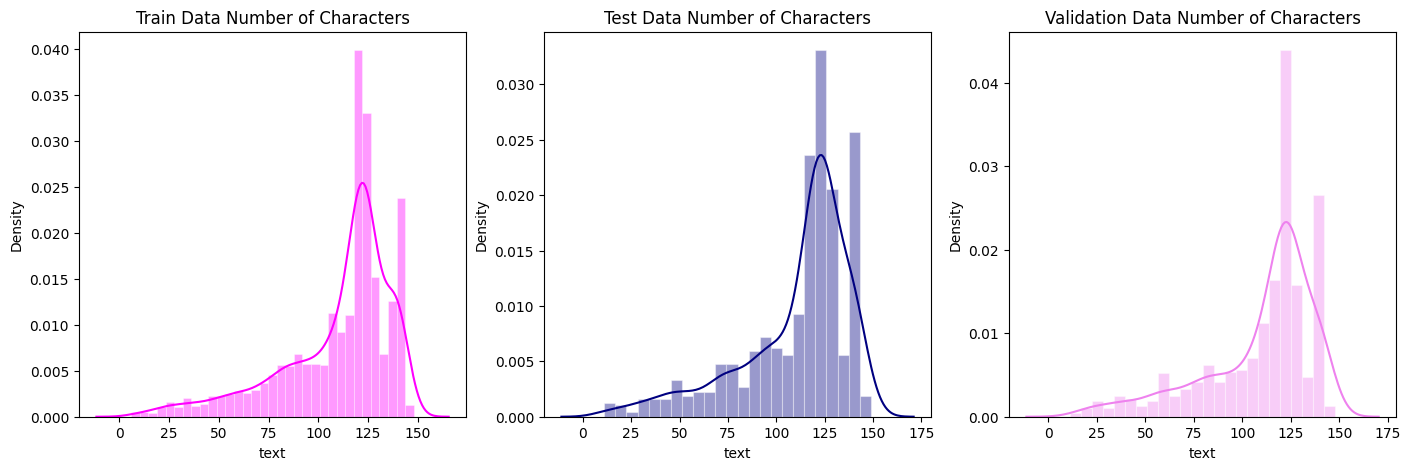

In [ ]:
xtrain_char = X_train.str.len()
xtest_char = X_test.str.len()
xval_char = X_val.str.len()

xtrain_token = X_train.str.split().map(lambda x: len(x))
xtest_token = X_test.str.split().map(lambda x: len(x))
xval_token = X_val.str.split().map(lambda x: len(x))

fig,(ax1,ax2, ax3)=plt.subplots(1,3,figsize=(17,5))

sns.histplot(xtrain_char.map(lambda x: np.mean(x)), ax=ax1, color="magenta", kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))
ax1.set_title('Train Data Number of Characters')

sns.histplot(xtest_char.map(lambda x: np.mean(x)), ax=ax2, color="navy", kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))
ax2.set_title('Test Data Number of Characters')

sns.histplot(xval_char.map(lambda x: np.mean(x)), ax=ax3, color="violet", kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))
ax3.set_title('Validation Data Number of Characters')

plt.show()

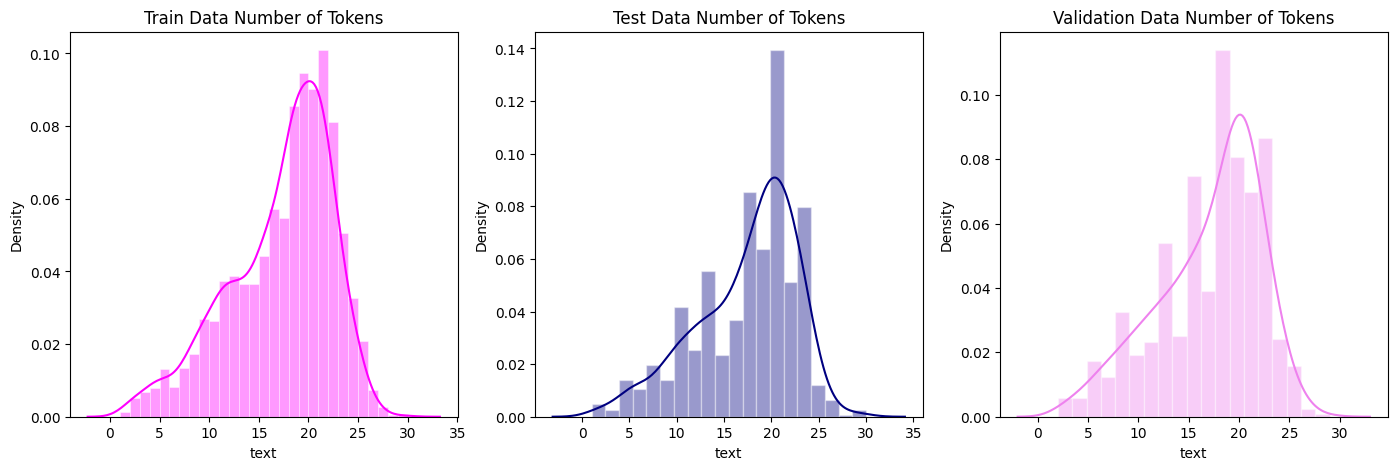

In [ ]:
fig,(ax1,ax2, ax3)=plt.subplots(1,3,figsize=(17,5))

sns.histplot(xtrain_token.map(lambda x: np.mean(x)), ax=ax1, color="magenta", kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))
ax1.set_title('Train Data Number of Tokens')

sns.histplot(xtest_token.map(lambda x: np.mean(x)), ax=ax2, color="navy", kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))
ax2.set_title('Test Data Number of Tokens')

sns.histplot(xval_token.map(lambda x: np.mean(x)), ax=ax3, color="violet", kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))
ax3.set_title('Validation Data Number of Tokens')


plt.show()

# 4. Developing BERT Model

In this part, we employ BERT Preprocessing model and Bert Encoder from Tensorflow_hub.

In [ ]:
import tensorflow_hub as hub
import tensorflow_text as text

## 4.1. Sentence Embedding

In [ ]:
preprocess_url = 'https://kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/en-uncased-preprocess/versions/3'
# encoder_url = 'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/4'
encoder_url = 'https://www.kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/bert-en-uncased-l-6-h-512-a-8/versions/2'

bert_preprocess = hub.KerasLayer(preprocess_url)
bert_encoder = hub.KerasLayer(encoder_url)

In [ ]:
def get_sentence_embeding(sentences):
  preproc_text = bert_preprocess(sentences)
  return bert_encoder(preproc_text)['pooled_output']

In [ ]:
# get_sentence_embeding(
#     ["Are you speaking about the atrocities and annihilation of Christians across the Middle East committed by Muslims daily?",
#      "Piscataway land // DC,this is an unfathomable number. I lived through a large earthquake and we slept under the table for one terrible night…"
#     ])

get_sentence_embeding(
    ["Are you speaking about the atrocities and annihilation of Christians across the Middle East committed by Muslims daily?",
     "Piscataway land // DC,this is an unfathomable number. I lived through a large earthquake and we slept under the table for one terrible night…"
    ])

<tf.Tensor: shape=(2, 512), dtype=float32, numpy=
array([[-0.22863358, -0.36592916, -0.40972868, ..., -0.06806742,
        -0.37666953, -0.1780143 ],
       [-0.3653127 , -0.08574648, -0.9916159 , ...,  0.01274555,
        -0.26177803, -0.1299072 ]], dtype=float32)>

## 4.2. Deep Learning Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import optimizers

# BERT Layer (Backbone)
text_input_layer = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input_layer)
bert_output = bert_encoder(preprocessed_text)

#Neural Network Layers (Head)
layer = tf.keras.layers.Dropout(0.7, name="dropout")(bert_output['pooled_output'])
layer = tf.keras.layers.Dense(8, activation='relu', name='hidden1')(layer)
layer = tf.keras.layers.Dense(5, activation='relu', name='hidden2')(layer)
layer = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(layer)

#Final Model
model = tf.keras.Model(inputs=[text_input_layer], outputs=[layer])


In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer_6 (KerasLayer)  {'input_type_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_word_ids': (None,                                           
                              128)}                                                               
                                                                                            

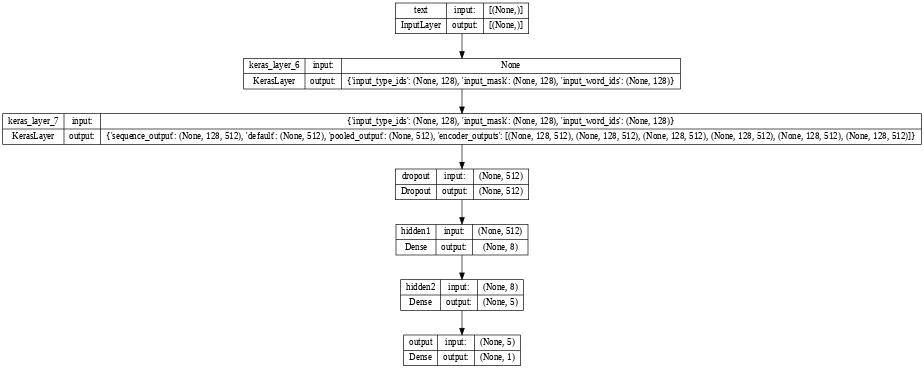

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, expand_nested=True, dpi=48)

In [ ]:
len(X_train)

2536

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

# initial_rate = 0.1
# end_rate = 0.001
# decay_steps = 100

# learning_rate_fn = optimizers.schedules.PolynomialDecay(
#     initial_rate,
#     decay_steps,
#     end_rate,
#     power=0.5)


# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
#               loss='binary_crossentropy',
#               metrics=METRICS)

model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=METRICS)

# 5. Train The Model

## 5.1. Fit Model ##

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    validation_data=(X_val, y_val),
                    batch_size=35)

Epoch 1/100
73/73 [==============================] - 102s 1s/step - loss: 0.7131 - accuracy: 0.4949 - precision: 0.4858 - recall: 0.1751 - val_loss: 0.6921 - val_accuracy: 0.5355 - val_precision: 0.5321 - val_recall: 0.5887
Epoch 2/100
73/73 [==============================] - 96s 1s/step - loss: 0.7001 - accuracy: 0.5099 - precision: 0.5133 - recall: 0.3793 - val_loss: 0.6918 - val_accuracy: 0.5343 - val_precision: 0.5214 - val_recall: 0.8345
Epoch 3/100
73/73 [==============================] - 95s 1s/step - loss: 0.6954 - accuracy: 0.5110 - precision: 0.5116 - recall: 0.4882 - val_loss: 0.6915 - val_accuracy: 0.5142 - val_precision: 0.5076 - val_recall: 0.9456
Epoch 4/100
73/73 [==============================] - 94s 1s/step - loss: 0.6962 - accuracy: 0.5028 - precision: 0.5027 - recall: 0.5150 - val_loss: 0.6924 - val_accuracy: 0.5083 - val_precision: 0.5043 - val_recall: 0.9764
Epoch 5/100
73/73 [==============================] - 94s 1s/step - loss: 0.6948 - accuracy: 0.5079 - precis

In [ ]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

27/27 [==============================] - 24s 895ms/step - loss: 0.5014 - accuracy: 0.7660 - precision: 0.7528 - recall: 0.7920
Test loss: 0.5013816356658936
Test accuracy: 0.7659574747085571


## 5.2. Training Curve ##

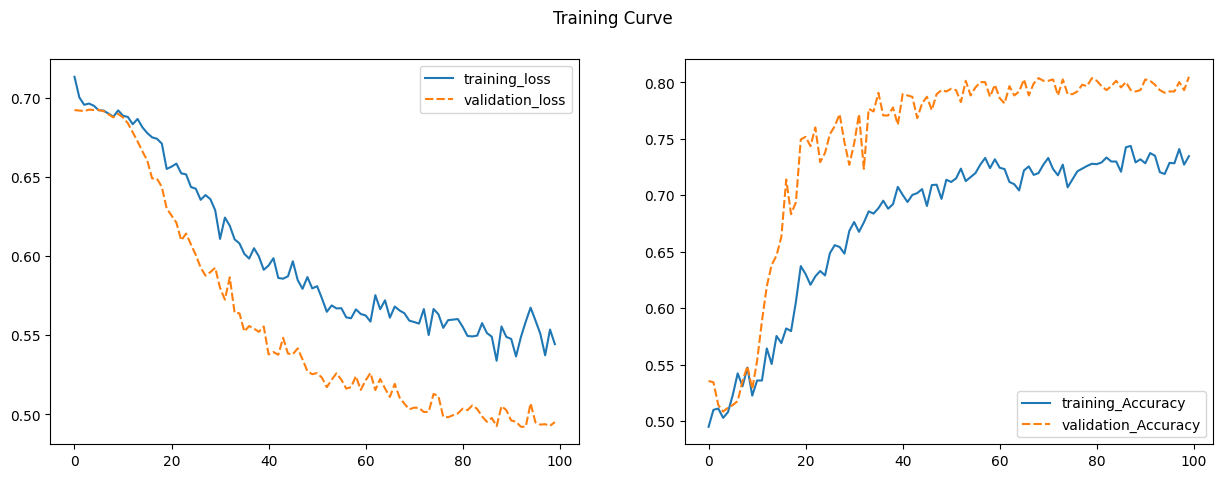

In [ ]:
fig, (axs1, axs2) = plt.subplots(1,2,figsize=(15,5))

loss = {
    'training_loss': history.history['loss'],
    'validation_loss': history.history['val_loss']
}

rmse = {
    'training_Accuracy': history.history['accuracy'],
    'validation_Accuracy': history.history['val_accuracy']
}

sns.lineplot(loss, ax=axs1, linestyle='solid')
sns.lineplot(rmse, ax=axs2, linestyle='solid')
fig.suptitle("Training Curve")

plt.show()

## 5.2. Predict Model

In [ ]:
y_predict = model.predict(X_test)

27/27 [==============================] - 24s 874ms/step


In [ ]:
y_predict = y_predict.flatten()
y_predict

array([0.351491  , 0.74830204, 0.1211617 , 0.5725866 , 0.26883358,
       0.44472343, 0.80296415, 0.20509511, 0.7202802 , 0.5470103 ,
       0.23089072, 0.5019055 , 0.374477  , 0.22974813, 0.16192675,
       0.49286366, 0.3818479 , 0.7424209 , 0.69282514, 0.55392504,
       0.35202223, 0.71514875, 0.24452196, 0.22605881, 0.47468248,
       0.80296415, 0.7341783 , 0.3489113 , 0.41505766, 0.80296415,
       0.7220483 , 0.29586518, 0.80296415, 0.2258467 , 0.7682406 ,
       0.80296415, 0.52546847, 0.65234727, 0.74604815, 0.5549348 ,
       0.31845477, 0.80296415, 0.33490452, 0.48151204, 0.35735995,
       0.55548334, 0.19786343, 0.65236187, 0.71594775, 0.46275958,
       0.43917537, 0.6338467 , 0.5147547 , 0.38255814, 0.3588417 ,
       0.47952887, 0.20921361, 0.15661226, 0.18930267, 0.7461009 ,
       0.42534515, 0.80296415, 0.6293099 , 0.44045848, 0.61761194,
       0.80296415, 0.6409393 , 0.42832643, 0.50210935, 0.27152362,
       0.24987303, 0.42126948, 0.5077439 , 0.5087576 , 0.53636

In [ ]:
y_predict = np.where(y_predict > 0.5, 1, 0)
y_predict

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,

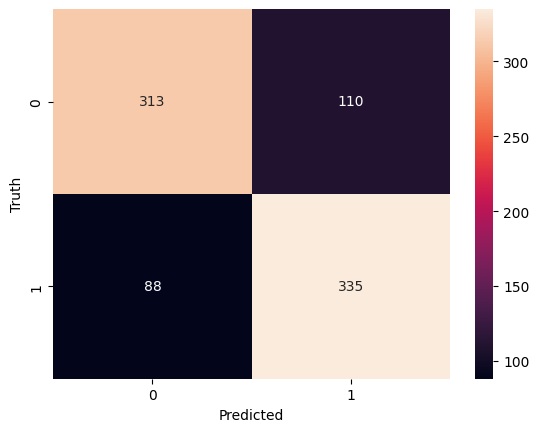

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cmtrix = confusion_matrix(y_test, y_predict)
sns.heatmap(cmtrix, annot=True, fmt='d')

plt.xlabel("Predicted")
plt.ylabel("Truth")

plt.show()

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       423
           1       0.75      0.79      0.77       423

    accuracy                           0.77       846
   macro avg       0.77      0.77      0.77       846
weighted avg       0.77      0.77      0.77       846

